In [1]:
import pandas as pd
import numpy as np

# file data
df=pd.read_csv('aoc_2018_6.txt', sep=',',header=None)

# testdata
#df = pd.DataFrame.from_records([(1, 1), (1, 6), (8, 3), (3, 4), (5, 5), (8, 9)])
print('shape = {}'.format(df.shape))
dim_size = max(df[0].max(), df[1].max()) + 1
print('largest dimension size (x/y): {}'.format(dim_size))
print(df.head())
# print first row x 
x = df.iloc[0][0]
print(x)
# print first row y
y = df.iloc[0][1]
print(y)

shape = (50, 2)
largest dimension size (x/y): 353
     0    1
0  336  308
1  262   98
2  352  115
3  225  205
4  292  185
336
308


In [2]:
m = np.zeros((dim_size, dim_size))
print(m)
print('shape = {}'.format(m.shape))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape = (353, 353)


In [3]:
# iterate over dataframe row to calculate the distances from every point in the matrix 
# (for each row separately)
dist = {}
for idx, row in df.iterrows():
    print(idx, row[0], row[1])
    x = row[0]
    y = row[1]
    for i in range(0, dim_size):
      for j in range(0, dim_size):
        if i <= x: 
            val_x = x - i
        else:
            val_x = i - x 
        if j <= y:
            val_y = y - j
        else:
            val_y = j - y
        dist_x = val_x + val_y 
        m[j][i] = dist_x
        
    #print(m)
    dist[idx] = np.copy(m) # very important to copy instead of just assigning a reference

    
    
# combine previous result in a target matrix (t) to generate 'distance regions'
t = np.zeros((dim_size, dim_size))

for i in range(0, dim_size):
  for j in range(0, dim_size):
    
    # start with the biggest number possible
    smallest_dist = dim_size + dim_size
    found_one = 0
    key = -1
    
    # check the indiv. distance matrices for the current x,y coordinate
    for k,v in dist.items(): # k is the key, v is the value
        if v[j][i]  <= smallest_dist:
            if v[j][i] < smallest_dist:
                smallest_dist = v[j][i]
                found_one = 1 # reset counter for this distance (first encounter)
            else: # start counting how many matrices contain this distance value
                found_one += 1
            key = k
    
    if found_one == 1:
        t[j][i] = key
    else:
        t[j][i] = -1

print(t)


        


0 336 308
1 262 98
2 352 115
3 225 205
4 292 185
5 166 271
6 251 67
7 266 274
8 326 85
9 191 256
10 62 171
11 333 123
12 160 131
13 211 214
14 287 333
15 231 288
16 237 183
17 211 272
18 116 153
19 336 70
20 291 117
21 156 105
22 261 119
23 216 171
24 59 343
25 50 180
26 251 268
27 169 258
28 75 136
29 305 102
30 154 327
31 187 297
32 270 225
33 190 185
34 339 264
35 103 301
36 90 92
37 164 144
38 108 140
39 189 211
40 125 157
41 77 226
42 177 168
43 46 188
44 216 244
45 346 348
46 272 90
47 140 176
48 109 324
49 128 132
[[36. 36. 36. ... 19. 19. 19.]
 [36. 36. 36. ... 19. 19. 19.]
 [36. 36. 36. ... 19. 19. 19.]
 ...
 [24. 24. 24. ... 45. 45. 45.]
 [24. 24. 24. ... 45. 45. 45.]
 [24. 24. 24. ... 45. 45. 45.]]


In [4]:
# find continuous area within matrix (bounded in all directions):
# -> candidates can not have any entries on the outer edges of the matrix

def test_candidate(c):
  # first row
  for x in range(dim_size):
    if t[0, x] == c:
        return False
  # last row
  for x in range(dim_size):
    if t[dim_size -1, x] == c:
        return False
    
  for y in range(dim_size):
    if t[y, 0] == c:
        return False
     
  for y in range(dim_size):
    if t[y, dim_size -1] == c:
        return False
    
  return True

def calc_region(c):
  area = 0
  for i in range(0, dim_size):
    for j in range(0, dim_size):
       if t[i, j] == c:
         area += 1
  return area

# final step
max_area = 0
for i in range(len(df)):
  test_result = test_candidate(i)
  if test_result:
    area = calc_region(i)
    print(i, test_result, area)
    if area > max_area:
        max_area = area
  else:
    print(i, test_result)

0 False
1 True 1224
2 False
3 True 980
4 False
5 True 1490
6 False
7 True 2271
8 False
9 True 791
10 True 1299
11 True 2063
12 True 1202
13 True 663
14 False
15 False
16 True 1682
17 True 807
18 True 1204
19 False
20 True 1379
21 False
22 True 2384
23 True 1711
24 False
25 False
26 True 967
27 True 2034
28 False
29 True 935
30 False
31 False
32 True 2832
33 True 902
34 False
35 True 3401
36 False
37 True 1034
38 True 845
39 True 1546
40 True 517
41 False
42 True 944
43 False
44 True 1175
45 False
46 True 919
47 True 2226
48 False
49 True 1038


In [5]:
max_area # correct answer was: 3401

3401

In [8]:
# calc dist to all points in dataframe
def calc_dist_to_all(j, i, df, limit):
    #print(j, i)
    sum = 0
    for e in df.iterrows(): # e[0] is the row index, e[1] is the entire value, e[1][0] is the x value
        x = e[1][0]
        y = e[1][1]
        sum += abs(j-x) + abs(i-y)
        if sum > limit: # attempt can be aborted early 
           return 0
    return sum
    
# new 'distance summary' result matrix
limit = 10000
s = np.zeros((dim_size, dim_size))
for i in range(0, dim_size):
  for j in range(0, dim_size):
    s[j][i] = calc_dist_to_all(i, j, df, limit) # careful with the x and y coordinate order

print(s)

# calculate size of the region
print(np.count_nonzero(s)) # don't use loops when numpy can do it in one step

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
49369


49327


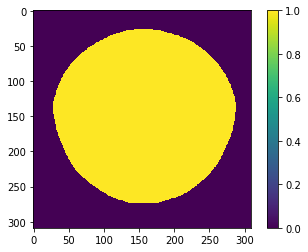

In [13]:
# much faster, correct and compact solution ...
# https://www.reddit.com/r/adventofcode/comments/a3kr4r/2018_day_6_solutions/
import numpy as np
from scipy.spatial import distance

# read the data using scipy
points = np.loadtxt('aoc_2018_6.txt', delimiter=', ')   

# build a grid of the appropriate size - note the -1 and +2 to ensure all points
# are within the grid
xmin, ymin = points.min(axis=0) - 1
xmax, ymax = points.max(axis=0) + 2

# and use mesgrid to build the target coordinates
xgrid, ygrid = np.meshgrid(np.arange(xmin, xmax), np.arange(xmin, xmax))
targets = np.dstack([xgrid, ygrid]).reshape(-1, 2)

# happily scipy.spatial.distance has cityblock (or manhatten) distance out
# of the box
cityblock = distance.cdist(points, targets, metric='cityblock')

# turns out using this method the solution is easier that before - simply
# sum the distances for each possible grid location
origin_distances = cityblock.sum(axis=0)
# set the value of appropriate distances to 1, with the remainder as zero
region = np.where(origin_distances < 10000, 1, 0)
# and the sum is the result.
print(region.sum())

# again, a nice picture for good measure
import matplotlib.pyplot as plt
plt.imshow(region.reshape(xgrid.shape))
plt.colorbar()
plt.show()